### California Housing Prices dataset

#### 1. Frame the problem 
Use the California census data to build a model of housing prices in the state. Predictions will be the median housing price per block group, where a block group (or district) is the smallest geographical unit for which the US Census Bureau publishes sample data. The model's output will then be fed to another ML system to determine whether it is worth investing in a given area or not. 

1. Supervised learning task, as we have labeled training examples. 
2. Multiple regression task, as we are asked to predict a value using multiple features. The regression is also univariate as we are trying to predict a single value for each district. 
3. Batch learning, as no continuous flow of data is coming into the system.

#### 2. Select a performance measure 
Valid alternatives for regression tasks are distance measures (or norms) between the vector of predictions and the vector of target values. In general, the higher the norm index, the more it focuses on large values and neglects small ones. 

1. Mean Absolute Error (MAE): sum of absolute distances, corresponds to the L1 norm. This is preferred when there are many outliers. 
2. Root Mean Squared Error (RMSE): square root of sum of squares, corresponds to the Euclidean or L2 norm. This is preferred to the MAE when outliers are exponentially rare (i.e. in a Gaussian-like curve). 

#### 3. Download the data
Write a function to fetch the data

In [54]:
import os 
import tarfile 
import urllib

In [55]:
FARM_PATH = "/nfs/team292/vl6/MachineLearning/"
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = FARM_PATH + os.path.join("datasets", 'housing')
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [56]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

Call function to create datasets/housing directory, download the housing.tgz file and extract the housing.csv file in this directory

In [57]:
fetch_housing_data()

Write a function to load the data using pandas 

In [58]:
import pandas as pd 

In [59]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [60]:
housing = load_housing_data()

Inspect the data

In [61]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [62]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [63]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [64]:
housing.describe() # Summary of numerical attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Plot a histogram for each numerical value

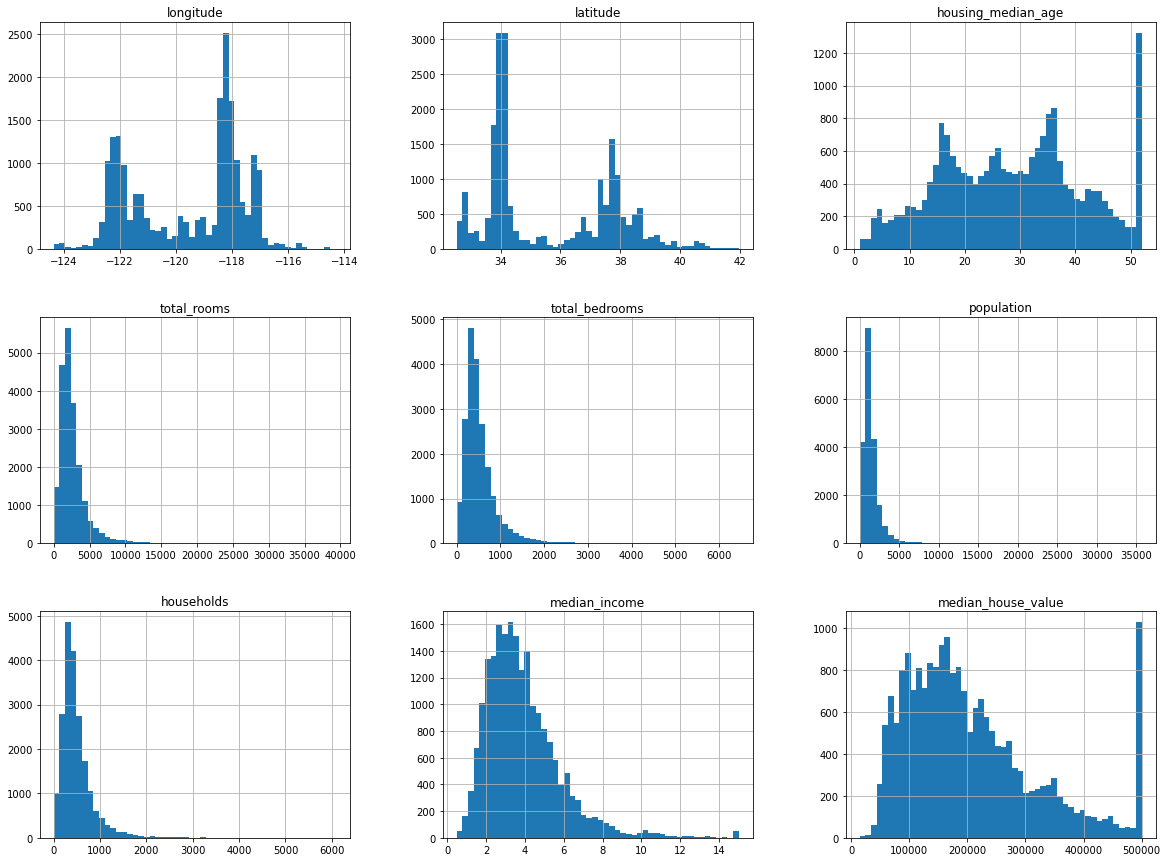

In [65]:
%matplotlib inline 
import matplotlib.pyplot as plt 
housing.hist(bins = 50, figsize=(20,15))
plt.show()

Observations: 

 * Median income attribute is scaled and capped at 15 for higher median incomes and at 0.5 for lower median incomes. The values roughly represent tens of thousands of dollars. 
 * Housing median age and median house value are also capped --> might be a problem for median house value as it is the value we are trying to predict 
 * Many histograms are tail-heavy

#### 4. Create a test set 

In [66]:
from sklearn.model_selection import train_test_split

*train_test_split* can also be passed multiple datasets with an identical number of rows, and it will split them on the same indices. This is very handly if you have a separated dataframe for the labels.

**important**: this is a purely random sampling method! If the observations were collected using stratified sampling, then the right number of instances must be sampled from each stratum to guarantee that the test set is representative of the overall population. 

In [67]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 1234)

If we were told that the median income was an important predictor of median housing prices, then we want to make sure that our test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, we first have to split it into categories.

In [68]:
import numpy as np

<AxesSubplot:>

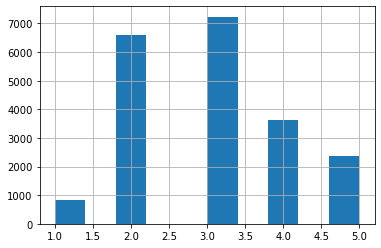

In [69]:
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels = [1, 2, 3, 4, 5])
housing['income_cat'].hist()

We can now do stratified sampling based on the income category with *StratifiedShuffleSplit*

In [70]:
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 1234)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [71]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

We can remove the *income_cat* attribute so that the data is back to its original state

In [72]:
for set_ in (strat_train_set, strat_test_set): 
    set_.drop("income_cat", axis = 1, inplace = True)

#### 5. Discover and visualize data to gain insights 

Create a copy of the training dataset to avoid harming it while playing around with data exploration

In [73]:
housing = strat_train_set.copy()

Visualize geographical data: latitute and longitude 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

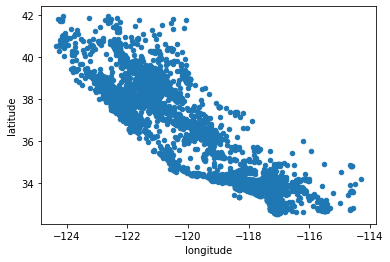

In [74]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

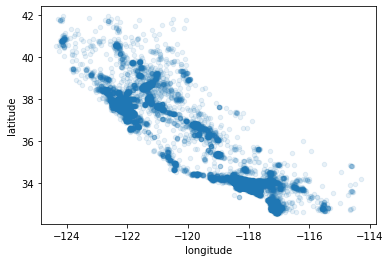

In [75]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

Setting an alpha value of 0.1 allows to detect regions of high density of dataplots, which are in line with densily populated geographical regions in California.

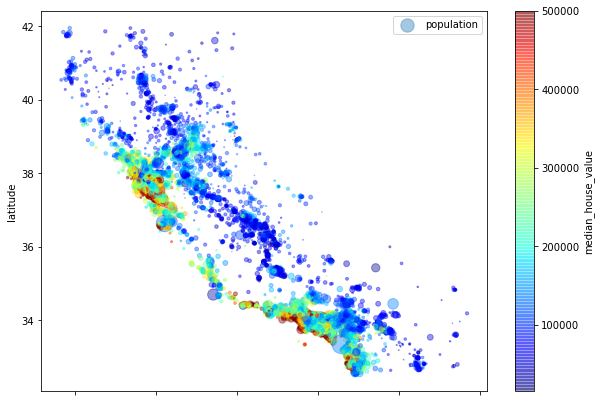

In [76]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, 
            s = housing['population']/100, label = 'population', figsize = (10, 7),
            c = 'median_house_value', cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

#### 6. Looking for correlations 

In [77]:
corr_matrix = housing.corr()

In [78]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690077
total_rooms           0.131453
housing_median_age    0.099620
households            0.064110
total_bedrooms        0.048565
population           -0.023790
longitude            -0.047697
latitude             -0.144086
Name: median_house_value, dtype: float64

Pearson's correlation coefficient ranges from -1 to +1. It only measures linear correlations and may completely miss on non-linear relationships between the two variables. 

In [79]:
from pandas.plotting import scatter_matrix 

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

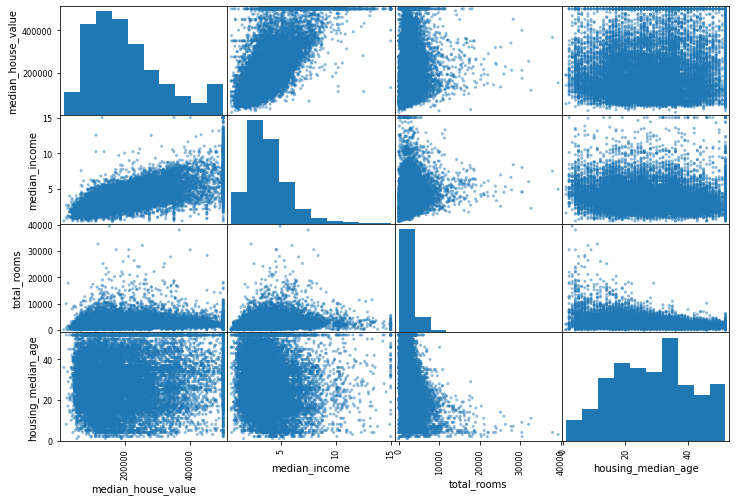

In [80]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (12, 8))

The function *scatter_matrix* plots every numerical attribute against every other numerical attribute, plus a histogram of each numerical attribute

#### 7. Experimenting with attribute combinations

Some attributes might not be informative as they have been recorded, but combining multiple attributes can lead to useful features. For example, we can create features that store information about the rooms per household, the bedrooms per room and the population per household.

In [81]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [82]:
corr_matrix_attr_combs = housing.corr()
corr_matrix_attr_combs['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.690077
rooms_per_household         0.153156
total_rooms                 0.131453
housing_median_age          0.099620
households                  0.064110
total_bedrooms              0.048565
population_per_household   -0.022425
population                 -0.023790
longitude                  -0.047697
latitude                   -0.144086
bedrooms_per_room          -0.261785
Name: median_house_value, dtype: float64

Indeed, it does look like bedrooms per room is more correlated with median house value than both the total rooms and the total bedrooms! Same goes for rooms per household that is more informative than the total rooms. 

#### 8. Data cleaning

Separate predictor varibales from the labels as we don't necessarily want to apply the same transformations to the predictors and the target values.

In [83]:
housing = strat_train_set.drop('median_house_value', axis = 1) 
housing_labels = strat_train_set['median_house_value'].copy() 

Most ML algorithms cannot work with missing features. In this dataset, the total_bedrooms attribute has some missing values, which can be fixed in 3 ways: 

 * Get rid of corresponding districts --> **housing.dropna(subset = ['total_bedrooms'])**
    
 * Get rid of whole attribute --> **housing.drop('total_bedrooms', axis = 1)**
    
 * Set the values to some value (zero, the mean, the median etc...) --> **median = housing['total_bedrooms'].median()**
   **housing['total_bedrooms'].fillna(median, inplace = True)**

Alternatively, we can use sklearn's class SimpleImputer to take care of missing values

In [84]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy = 'median') # strategy is a hyperparameter 
housing_num = housing.drop('ocean_proximity', axis = 1) # create copy of the data without the categorical attribute (median can only be computed on numerical attributes)
imputer.fit(housing_num)
imputer.statistics_ # stores the compute median of each attribute 

array([-118.49  ,   34.25  ,   29.    , 2121.    ,  435.    , 1168.    ,
        410.    ,    3.5313])

In [85]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2121.    ,  435.    , 1168.    ,
        410.    ,    3.5313])

In [86]:
X = imputer.transform(housing_num) # returns a numpy array containing the transformed features 
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

#### 9. Handling categorical attributes

In [87]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
11587,<1H OCEAN
12635,INLAND
8021,<1H OCEAN
19326,<1H OCEAN
9052,INLAND
7835,<1H OCEAN
5476,<1H OCEAN
9712,<1H OCEAN
4348,<1H OCEAN
9615,INLAND


Categories can be converted to numbers using the OrdinalEncoder class

In [88]:
from sklearn.preprocessing import OrdinalEncoder 
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[0:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [89]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

However, one issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This is not the case for ocean proximity. To fix this, a common solution is to create one binary attribute per category --> one-hot encoding, because only one attribute will be equal to 1 (hot) while the others will be 0 (cold). 

In [90]:
from sklearn.preprocessing import OneHotEncoder 
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot # returns a sparse matrix

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [91]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### 10. Custom transformers 

To create a transformer that works seamlessly with sklearn, we have to create a class and implememt 3 methods: 
 * fit(), returning self 
 * transform()
 * fit_transform()

In [92]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or *kwargs --> hyperparameter 
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y = None):
        return self 
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room: 
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else: 
            return np.c_[X, rooms_per_household, population_per_household]
    

In [93]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

#### 11. Feature scaling

ML algorithms don't perform well when the input numerical attributes have very different scales. Two common ways to get all attributes to have the same scale: 
 * min-max scaling: values are shifted and rescaled so that they end up ranging from 0 to 1. Subtract the min value and divide by max = min. **MinMaxScaler** has hyperparameter feature_range to change the range 
 * standardization: subtract the mean value to have zero mean and divide by standard deviation to have unit variance. Less affected than mix-max scaling by outliers, but does not bring the values in the same range. **StandardScaler**

#### 12. Transformation pipelines

**Pipeline** constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers. When we call the pipeline's fit() method, it calles fit_transform() sequentially on all transformers, passing the output of each call as the parameter to the next call until it reaches the final estimator, for which it calls the fit() method.

The pipeline exposes the same methods as the final estimator --> StandardScaler is a transformer so the pipeline will have a fit_transform() method.

In [94]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()), 
    ('std_scaler', StandardScaler()),
])

In [95]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

Sklearn v 0.20 also has a **ColumnTransformer** class that allows to apply different transformations to different columns, so that for example we can simultaneously deal with numerical and categorical attributes.

In [96]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs), # add list of column names that the transformer should be applied to 
    ('cat', OneHotEncoder(), cat_attribs),
])

In [97]:
housing_prepared = full_pipeline.fit_transform(housing) # concatenates the outputs along the second axis 

! Note that the OneHotEncoder returns a sparse matrix while the num_pipeline returns a dense matrix --> ColumnTransformer estimates the density of the final matrix as the ratio of nonzero to zero cells and returns a sparse matrix if the density is lower than a given threshold (by default sparse_threshold = 0.3). 

#### 13. Training and evaluating on the training set with cross-validation

In [98]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV 

param_grid = [
    {'n_estimators' : [3, 10, 30], 
    'max_features' : [2, 4, 6, 8]}, 
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [99]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [100]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [101]:
grid_search.cv_results_

{'mean_fit_time': array([0.05010519, 0.1638289 , 0.4843822 , 0.08312063, 0.26603394,
        0.79700351, 0.11407461, 0.36784105, 1.09790869, 0.1461113 ,
        0.47557483, 1.42969255, 0.07864552, 0.25230622, 0.1023315 ,
        0.33860502, 0.12910662, 0.42997012]),
 'std_fit_time': array([0.00158909, 0.00336585, 0.00283192, 0.00220394, 0.00165581,
        0.00291768, 0.0013364 , 0.0044107 , 0.00761677, 0.00409918,
        0.0039376 , 0.01051372, 0.00173764, 0.00539903, 0.00111643,
        0.00359933, 0.00197886, 0.00485114]),
 'mean_score_time': array([0.00321288, 0.00985947, 0.02821584, 0.00325255, 0.00954037,
        0.02841215, 0.00330868, 0.00963788, 0.02832441, 0.00351892,
        0.00992026, 0.02834349, 0.00388732, 0.01155491, 0.00380087,
        0.01163201, 0.00381684, 0.01176357]),
 'std_score_time': array([3.49516348e-04, 7.37879790e-04, 6.03976623e-04, 1.52389457e-04,
        1.18843796e-04, 1.17384719e-04, 1.69954597e-04, 1.33761229e-04,
        2.38250263e-04, 5.31002348e-

We can use RandomizedSearchCV instead of GridSearchCV to evaluate a random number of combinations of hyperparameters by selecting a random value for each hyperparameter at each iteration. 

#### 14. Analyze best models and their errors

In [103]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.61729937e-02, 7.25714381e-02, 4.01081887e-02, 1.82285708e-02,
       1.63560824e-02, 1.73511658e-02, 1.48369496e-02, 3.06648349e-01,
       5.74394213e-02, 1.04881754e-01, 8.22557932e-02, 1.34160382e-02,
       1.59541794e-01, 2.45492753e-04, 2.97698783e-03, 6.96898087e-03])

In [104]:
extra_attribs = ['rooms_per_household', 'population_per_household', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs 
sorted(zip(feature_importances, attributes), reverse = True)

[(0.3066483489010767, 'median_income'),
 (0.15954179407998167, 'INLAND'),
 (0.10488175364413745, 'population_per_household'),
 (0.08617299365879288, 'longitude'),
 (0.08225579324675995, 'bedrooms_per_room'),
 (0.07257143812609106, 'latitude'),
 (0.057439421313674154, 'rooms_per_household'),
 (0.04010818874314961, 'housing_median_age'),
 (0.018228570778045308, 'total_rooms'),
 (0.017351165764771734, 'population'),
 (0.016356082407944453, 'total_bedrooms'),
 (0.01483694964092477, 'households'),
 (0.013416038248710889, '<1H OCEAN'),
 (0.0069689808654852855, 'NEAR OCEAN'),
 (0.0029769878272868223, 'NEAR BAY'),
 (0.000245492753167366, 'ISLAND')]

#### 15. Evaluate the model on the test set

In [106]:
final_model = grid_search.best_estimator_ 
X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy() 

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [107]:
final_rmse

50081.46736707555

#### End of notebook